In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
def show_gray(img,title="Image"):
    """Display a grayscale image using matplotlib."""
    if img is None:
        raise ValueError("Image is None. check the image path.")
    plt.figure(figsize=(5,5))
    plt.imshow(img,cmap='gray')
    plt.title(title)
    plt.show()
    

In [3]:
def show_side_by_side(img1, img2, title1="Image 1", title2="Image 2"):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title(title2)
    plt.axis('off')

    plt.show()

In [6]:
# image reading.
image_path="D:\Python project\Python Project for my understanding\images.jpg"
img=cv2.imread(image_path)
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

shape(h,w): (168, 300)
Data type: uint8


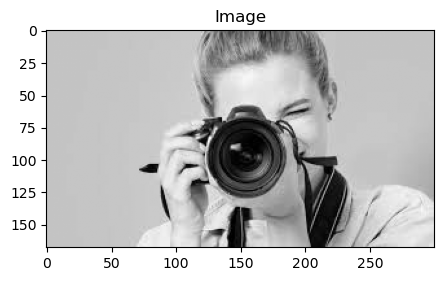

In [11]:
print("shape(h,w):",img_gray.shape)
print("Data type:", img_gray.dtype)
show_gray(img_gray)

In [14]:
# blur the image 
blur_box=cv2.blur(img_gray,(5,5))
blur_gaussian=cv2.GaussianBlur(img_gray,(5,5),sigmaX=1.0)
blur_median=cv2.medianBlur(img_gray,5)


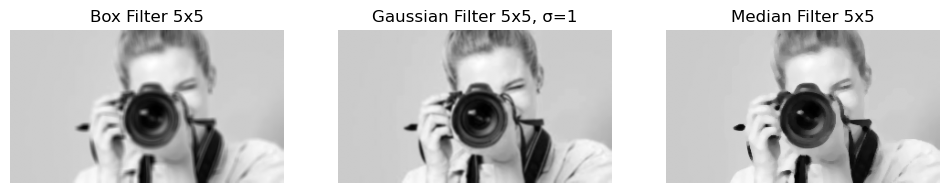

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(blur_box, cmap='gray')
plt.title('Box Filter 5x5')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blur_gaussian, cmap='gray')
plt.title('Gaussian Filter 5x5, σ=1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blur_median, cmap='gray')
plt.title('Median Filter 5x5')
plt.axis('off')

plt.show()


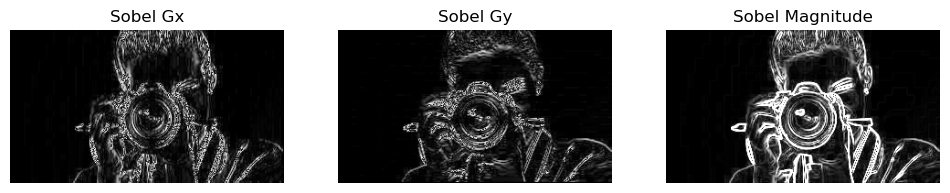

In [16]:
Gx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)

# Gradient magnitude
G_mag = np.sqrt(Gx**2 + Gy**2)
G_mag = np.uint8(np.clip(G_mag, 0, 255))

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(np.uint8(np.absolute(Gx)), cmap='gray')
plt.title('Sobel Gx')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.uint8(np.absolute(Gy)), cmap='gray')
plt.title('Sobel Gy')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(G_mag, cmap='gray')
plt.title('Sobel Magnitude')
plt.axis('off')

plt.show()